# PROJECT : NETFLIX MOVIES AND TV SHOWS
## Data Informaton:

Where the Data Came From ? 

I am searching for the data sets in Internet. And I found this dataset on kaggle website. This website provides sample data sets to work up on. I used a sample data provided Netflix Movies and TV shows.

Size of Data : 
1. Columns : 12
2. Rows : 6235
3. Size : 971 KB



# code explanation:

This code imports pandas to load csv into dataframes , matplot lib to plot the visualizations and datetime to convert the column into a general date format

In [68]:
# Importing pandas and this also prints the version. 
# Prnting the version will enable the end user to get to the existing version. 
import pandas as pd
print(pd.__version__)

0.25.1


In [69]:
# Importing pyplot. This is used to plot different kinds like bras, scatter plots, pie charts etc..
import matplotlib.pyplot as plt

In [70]:
# datetime module is used to convert any string in to a date format. 
# This is used to resolve the 'Funded Column' inconsistences
import datetime as dateFormat

In [71]:
# The CSV file is loaded into the data frame. 
# The names of the data frame are customized just to make them more clear.
# skiprows will take an index and will elimniate the row at that index. 
# Here, it is used to remove the headers. 
data = pd.read_csv(r'C:\Users\nvgsiva sai\Downloads\netflix_titles.csv', 
                        names = ['show_id','type','title'
                                ,'director','cast','country','date_added'
                                ,'release_year','rating','duration','listed_in',"description"], 
                        skiprows = [0])

In [74]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [75]:
# Since Funded date column in not in proper date format. 
# It is converted into datetime using pandas and datetime.
# date_added colum inconsistency is solved here and this appies to every row of date_added column
data['date_added'] = pd.to_datetime(data['date_added'], infer_datetime_format=True)


In [76]:
#No of null values in the columns
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [77]:
#dropping the columns of director and cast which we will not be used for visualizing
drop_cols=["director","cast","rating"]
data.drop(drop_cols,axis=1,inplace=True)

In [78]:
#number of columns and rows after dropping the columns director and cast
data.shape

(6234, 9)

In [79]:
#sorting the values of country and release year 
data.sort=data.sort_values(by=["country","date_added"],ascending=[True,True])
data.sort.head()

C:\Users\nvgsiva sai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,show_id,type,title,country,date_added,release_year,duration,listed_in,description
4851,80115152,Movie,Abzurdah,Argentina,2016-08-25,2015,90 min,"Dramas, International Movies",A disenfranchised 16-year-old girl connects to...
4422,80142140,Movie,Daemonium,Argentina,2016-12-20,2015,115 min,"Action & Adventure, Horror Movies, Internation...",In a realm where magic and technology intersec...
3444,80125593,TV Show,Historia de un clan,Argentina,2017-01-13,2015,1 Season,"Crime TV Shows, International TV Shows, Spanis...",This drama based on a true story follows the P...
3321,80149575,Movie,Caida del Cielo,Argentina,2017-01-20,2016,78 min,"Comedies, International Movies, Romantic Movies",When Julia literally falls into Alejandro's ba...
4075,80156767,Movie,La Última Fiesta,Argentina,2017-02-01,2016,104 min,"Comedies, International Movies",Three best buddies are thrown into a wild chas...


On moving further, various calculations are done on 'country' column and it is important is not have Nan values and these columns should be cleaned. Data Frames have fillna() method which will return True if there is a Nan Value. I used this to replace the Nan values with appropriate values.

In [80]:
# fillna() is used to replcae the Nan values 
data["country"].fillna('other', inplace = True)

Now that data Cleaning, datatype conversions are done. It's time to decide which column to plot against which column

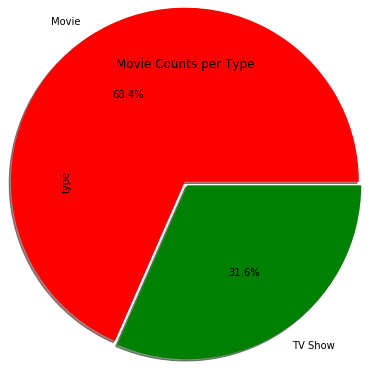

In [81]:
#plotting the counts of movies and Tv shows
#value_counts which is used to count the number of values present in the columns
#plotting the pie daiagram 
d=data['type'].value_counts()
d.plot.pie(radius=2,explode=[0,0.05],autopct='%1.1f%%',shadow=True, colors='rgb')
plt.title('Movie Counts per Type')
plt.show()

In [82]:
#importing the seaborn and plotly.express and graph objects as go
#%matplotlibinline which is used to display the graphs itself
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px

%matplotlib inline

NO OF MOVIES AND TVSHOWS RELEASED AFTER 1980

In [83]:
#group by is used for grouping the two columns for plotting show_id and releasing year
#with the help of plotly the bar chart between show_id and release_year
data_plot = data[data.release_year >= 1980].groupby(['release_year', 'type'])['show_id'].count().reset_index()
fig = px.bar(data_plot, x="release_year", y="show_id", color="type", barmode="group", text='show_id')
fig.show()

# COUNTRY WITH MAXIMUM CONTENT



The movie produced in the US is getting longer and longer?

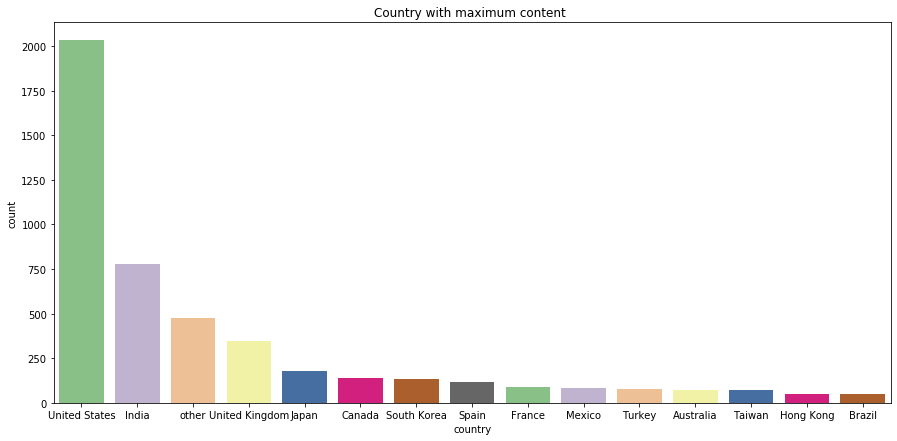

In [84]:
#countplot is used to create the hist or bar graphs
plt.figure(1, figsize=(15, 7))
plt.title("Country with maximum content ")
sns.countplot(x = "country", order=data['country'].value_counts().index[0:15],data=data,palette='Accent')

From the above graph we can declare that US(united states) is longer thnan the remaining countries

# NETFLIX FOCUSING OVER THE YEARS 

Is Netflix has increasingly focusing on TV rather than movies in recent years?


In [85]:
#value.counts().reset_index() is used to count the number of the values present in the type column and reseting the index
#with the .rename means renaming index names
d1 = data[data["type"] == "TV Show"]
d2 = data[data["type"] == "Movie"]
col = "release_year"
df1 = d1[col].value_counts().reset_index()
df1 = df1.rename(columns = {col : "count", "index" : col})
df1['percent'] = df1['count'].apply(lambda x : 100*x/sum(df1['count']))
df1 = df1.sort_values(col)
df2 = d2[col].value_counts().reset_index()
df2 = df2.rename(columns = {col : "count", "index" : col})
df2['percent'] = df2['count'].apply(lambda x : 100*x/sum(df2['count']))
df2 = df2.sort_values(col)


In [86]:
#with the help of plotly.object as go we have drawn the graph year and contents
#with the help of layout which is used to add the beauty to the graph
#dict is used the hold the key value pair tp get more optimized
data1 = go.Scatter(x=df1[col],y=df1["count"],name="TV Shows",marker=dict(color = 'rgb(249, 6, 6)',line=dict(color='rgb(0,0,0)',width=1.5)))
data2 = go.Scatter(x=df2[col],y=df2["count"],name="Movies",marker= dict(color = 'rgb(26, 118, 255)',line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Netflix focusing  over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [data1, data2], layout=layout)
fig.show()

from the above graph we have concluded the netflix  is focusing more  on movies rather than  Tv shows from 1925-2020 from the hypotheses we have concluded that it is a False